# Desafío - Caja de los Andes


### Objetivos

1.  📚 **Entender el problema**  
   Definir claramente el problema que se intenta resolver con machine learning.

2. 🗂️ **Recolectar y preparar los datos**
   Recopilar, limpiar y preparar los datos necesarios para entrenar el modelo.

3. 🤖 **Seleccionar un modelo adecuado**  
   Elegir el algoritmo o modelo de machine learning más apropiado para el problema.

4. 🎓 **Entrenar el modelo**  
   Utilizar los datos para entrenar el modelo y ajustar sus parámetros.

5. 📊 **Evaluar el rendimiento**  
   Medir la precisión y eficacia del modelo utilizando métricas relevantes.

6. 🚀 **Optimizar el modelo**  
   Ajustar los parámetros y mejorar el modelo para obtener mejores resultados.

7. 🛠️ **Implementar el modelo en producción**  
   Desplegar el modelo para que pueda ser utilizado en un entorno real.

8. 🔄 **Monitorear y actualizar**  
   Supervisar el rendimiento del modelo en el tiempo y actualizarlo según sea necesario.



## Descripción del conjunto de datos

| Columna | Descripción                                                                 | Tipo de Datos |
|---------|------------------------------------------------------------------------------|---------------|
| `x1`    | Coordenada X de la posición geográfica.                                      | `float`       |
| `x2`    | Coordenada Y de la posición geográfica.                                      | `float`       |
| `x3`    | Código del tipo de vehículo involucrado (e.g., SAT: Satélite, LCV: Vehículo Ligero). | `string`      |
| `x4`    | Código del área geográfica específica de operación.                          | `string`      |
| `x5`    | Indicador binario del estado del sistema de navegación (0: Desactivado, 1: Activado). | `int`         |
| `x6`    | Indicador binario de la señal de control (0: Sin señal, 1: Señal activa).    | `int`         |
| `x7`    | Número de satélites visibles o conectados.                                   | `int`         |
| `x8`    | Desviación de altitud con respecto al nivel de referencia.                   | `float`       |
| `target`| Variable objetivo que indica si la operación fue exitosa (0: No, 1: Sí).     | `int`         |


## 2. Recolección de Datos
- Descripción de las fuentes de datos utilizadas.
- Explicación del proceso de recolección de datos.
- Herramientas y tecnologías utilizadas para la obtención de datos.


In [1]:
# librerias
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [39]:
# lectura de los datos
path = "https://raw.githubusercontent.com/vcanalesp/ds_caja_andes/main/data/dataset_Caso_1.csv"
df = pd.read_csv(path,sep=',')
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,target
0,50.1341,-326.0000,SAT,MZBER,0,0,6,-6.5,0
1,50.1341,-326.0000,SAT,MZBER,0,0,6,-4.5,0
2,124.3276,-275.1935,LCV,MZBER,0,0,3,-2.5,0
3,50.1341,-326.0000,SAT,MZBER,0,0,3,-4.5,0
4,85.3905,-298.8632,XJB,MZBER,0,0,5,-4.5,0


In [4]:
# ver información

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2000 non-null   float64
 1   x2      2000 non-null   float64
 2   x3      2000 non-null   object 
 3   x4      2000 non-null   object 
 4   x5      2000 non-null   int64  
 5   x6      2000 non-null   int64  
 6   x7      2000 non-null   int64  
 7   x8      2000 non-null   float64
 8   target  2000 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 140.8+ KB


In [5]:
# ver si hay duplicados

df.duplicated().sum()

157

In [6]:
# eliminar duplicados y verificar

df = df.drop_duplicates()
df.duplicated().sum()

0

In [7]:
# ver información para ver los cambios

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1843 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1843 non-null   float64
 1   x2      1843 non-null   float64
 2   x3      1843 non-null   object 
 3   x4      1843 non-null   object 
 4   x5      1843 non-null   int64  
 5   x6      1843 non-null   int64  
 6   x7      1843 non-null   int64  
 7   x8      1843 non-null   float64
 8   target  1843 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 144.0+ KB


In [8]:
# ver análisis estadístico

df.describe()

,x1,x2,x5,x6,x7,x8,target
count,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000
mean,104.391221,-296.156649,0.013565,0.029300,3.385784,-5.258003,0.011937
std,18.610906,15.264666,0.115707,0.168692,0.902015,1.563715,0.108632
min,50.134100,-326.000000,0.000000,0.000000,3.000000,-7.500000,0.000000
25%,92.991200,-306.342500,0.000000,0.000000,3.000000,-6.500000,0.000000
50%,106.430400,-296.491800,0.000000,0.000000,3.000000,-5.500000,0.000000
75%,116.800800,-287.032300,0.000000,0.000000,3.000000,-4.500000,0.000000
max,150.134100,-226.000000,1.000000,1.000000,8.000000,-1.500000,1.000000



## 3. Exploración de Datos (EDA)
- Análisis descriptivo de los datos.
- Visualización de las principales características de los datos.
- Identificación de patrones, anomalías, y tendencias.
- Limpieza y preparación de los datos para su uso en modelos.


### Análisis Univariado

In [9]:
# Analisis univariado

for col in df.columns:
  print(col)
  print(df[col].value_counts().sort_index())

x1
x1
50.1341     41
57.2770      2
57.8264      1
59.2250      1
60.2924      1
            ..
141.8801     1
142.1695     1
145.1341     1
145.3722     1
150.1341    31
Name: count, Length: 1183, dtype: int64
x2
x2
-326.0000    73
-324.1132     1
-324.0583     1
-323.8261     2
-323.2973     1
             ..
-244.1818     1
-242.6667     1
-238.5000     1
-236.0000     1
-226.0000     9
Name: count, Length: 1149, dtype: int64
x3
x3
LCV    914
QKP     79
SAT    571
XJB    279
Name: count, dtype: int64
x4
x4
MZBER    1761
PQKE       36
YEQA       41
ZUQF        5
Name: count, dtype: int64
x5
x5
0    1818
1      25
Name: count, dtype: int64
x6
x6
0    1789
1      54
Name: count, dtype: int64
x7
x7
3    1511
4     102
5      83
6     146
8       1
Name: count, dtype: int64
x8
x8
-7.5    289
-6.5    346
-5.5    462
-4.5    323
-3.5    267
-2.5    111
-1.5     45
Name: count, dtype: int64
target
target
0    1821
1      22
Name: count, dtype: int64


### Análisis Bivariado

#### Funciones para crear tablas

In [10]:
def crear_tabla(df, columna_grupo, columna_objetivo):
    """
    Crea un DataFrame que resume el número de ocurrencias de cada combinación
    de valores en las columnas especificadas.

    Args:
        df (pandas.DataFrame): El DataFrame original.
        columna_grupo (str): El nombre de la columna por la cual agrupar.
        columna_objetivo (str): El nombre de la columna objetivo para agrupar.

    Returns:
        pandas.DataFrame: Un DataFrame con las combinaciones únicas de
        'columna_grupo' y 'columna_objetivo', junto con el conteo de
        ocurrencias de cada combinación.
    """
    # Agrupar el DataFrame por las columnas especificadas y contar las ocurrencias
    df_tabla = df.groupby([columna_grupo,columna_objetivo]).size().reset_index().rename(columns = {0:"Count"})

    # Retornar el DataFrame resultante
    return df_tabla

In [11]:
def crear_tabla_por_rangos(df, columna_grupo, columna_objetivo, bins):
    """
    Crea un DataFrame que resume el número de ocurrencias de cada combinación
    de valores en las columnas especificadas, agrupando la columna de interés
    en rangos definidos por `bins`.

    Args:
        df (pandas.DataFrame): El DataFrame original.
        columna_grupo (str): El nombre de la columna que será agrupada en rangos.
        columna_objetivo (str): El nombre de la columna objetivo para agrupar.
        bins (int, list, or IntervalIndex): La especificación de los límites de
        los rangos para agrupar la columna `columna_grupo`. Puede ser un número
        que indique el número de bins, una lista de límites, o un IntervalIndex.

    Returns:
        pandas.DataFrame: Un DataFrame con las combinaciones únicas de rangos
        en la columna `columna_grupo` y valores en la columna `columna_objetivo`,
        junto con el conteo de ocurrencias de cada combinación.
    """
    # Crear una nueva columna en el DataFrame con los rangos de 'columna_grupo'
    rango_columna = "range_" + columna_grupo
    df[rango_columna] = pd.cut(df[columna_grupo], bins=bins)

    # Agrupar el DataFrame por los rangos de 'columna_grupo' y 'columna_objetivo',
    # y contar las ocurrencias
    df_rango = df.groupby([rango_columna, columna_objetivo], observed=False).size().reset_index().rename(columns={0: "Count"})

    # Retornar el DataFrame resultante
    return df_rango

#### Funciones para crear gráficos

In [12]:
def crear_grafico(df, columna_grupo, columna_objetivo):
    """
    Crea un gráfico de barras que muestra la distribución de la columna objetivo en función de la columna grupo.

    Args:
    df (pandas.DataFrame): El DataFrame que contiene los datos a graficar.
    columna_grupo (str): El nombre de la columna que agrupa las barras en el gráfico.
    columna_objetivo (str): El nombre de la columna objetivo que se mostrará como la altura de las barras.

    Returns:
    None: Esta función no retorna ningún valor, simplemente muestra el gráfico de barras.

    """

    # Crear la figura y la gráfica de barras
    plt.figure(figsize=(8, 5))
    barplot = sns.barplot(x=columna_grupo, y='Count', hue=columna_objetivo, data=df, palette="Set2")

    # Añadir los números encima de las barras
    for p in barplot.patches:
        width = p.get_width()
        if width > 0:
            barplot.annotate(format(p.get_height(), '.0f'),
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center',
                             xytext=(0, 9),
                             textcoords='offset points')

    # Título y etiquetas
    plt.title(f"{columna_objetivo} versus {columna_grupo}")
    plt.xlabel(columna_grupo)
    plt.ylabel(columna_objetivo)

    # Ajustar la leyenda
    handles, labels = barplot.get_legend_handles_labels()
    barplot.legend(handles=handles, labels=['0', '1'], title='target')

    # Mostrar la gráfica
    plt.show()

In [13]:
def crear_grafico_rangos(df, columna_grupo, columna_objetivo):
    """
    Crea un gráfico de barras que muestra la distribución de la columna objetivo en función de la columna grupo.

    Args:
    df (pandas.DataFrame): El DataFrame que contiene los datos a graficar.
    columna_grupo (str): El nombre de la columna que agrupa las barras en el gráfico.
    columna_objetivo (str): El nombre de la columna objetivo que se mostrará como la altura de las barras.

    Returns:
    None: Esta función no retorna ningún valor, simplemente muestra el gráfico de barras.

    Notes:
    - Los nombres de las barras se muestran encima de cada barra.
    - Las etiquetas del eje X se rotan 45 grados para una mejor legibilidad.
    - La leyenda se ajusta para reflejar los valores únicos de la columna objetivo.
    """

    # Crear la figura y la gráfica de barras
    plt.figure(figsize=(8, 5))
    barplot = sns.barplot(x=columna_grupo, y='Count', hue=columna_objetivo, data=df, palette="Set2")

    # Añadir los números encima de las barras
    for p in barplot.patches:
        width = p.get_width()
        if width > 0:
            barplot.annotate(format(p.get_height(), '.0f'),
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center',
                             xytext=(0, 9),
                             textcoords='offset points')

    # Título y etiquetas
    plt.title(f"{columna_objetivo} versus {columna_grupo}")
    plt.xlabel(columna_grupo)
    plt.ylabel(columna_objetivo)

    # Rotar eje X
    plt.xticks(rotation=45)

    # Ajustar la leyenda
    handles, labels = barplot.get_legend_handles_labels()
    barplot.legend(handles=handles, labels=['0', '1'], title=columna_objetivo)

    # Mostrar la gráfica
    plt.show()

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def crear_grafico_histograma (df, columna_grupo, columna_objetivo):
  # Suponiendo que 'df' es tu DataFrame, y tienes columnas 'columna_grupo' y 'columna_objetivo'
  sns.histplot(x=columna_grupo, hue=columna_objetivo, data=df, multiple='stack', kde=False, palette="Set2")

  # Añadir título y etiquetas
  plt.title('Histograma de columna_objetivo agrupado por columna_grupo')
  plt.xlabel(columna_objetivo)
  plt.ylabel(columna_grupo)

  # Mostrar gráfico
  plt.show()

### X1

In [15]:
df_x1 = crear_tabla(df,"x1","target")
df_x1

,x1,target,Count
0,50.1341,0,41
1,57.2770,0,2
2,57.8264,0,1
3,59.2250,0,1
4,60.2924,0,1
...,...,...,...
1183,141.8801,0,1
1184,142.1695,0,1
1185,145.1341,0,1
1186,145.3722,0,1


In [16]:
bins = [50,150, 300, 500, 1000, 10000, 100000, 200000]
df_rango_x1 = crear_tabla_por_rangos(df, "x1", "target", bins)
df_rango_x1

,range_x1,target,Count
0,"(50, 150]",0,1790
1,"(50, 150]",1,22
2,"(150, 300]",0,31
3,"(150, 300]",1,0
4,"(300, 500]",0,0
5,"(300, 500]",1,0
6,"(500, 1000]",0,0
7,"(500, 1000]",1,0
8,"(1000, 10000]",0,0
9,"(1000, 10000]",1,0


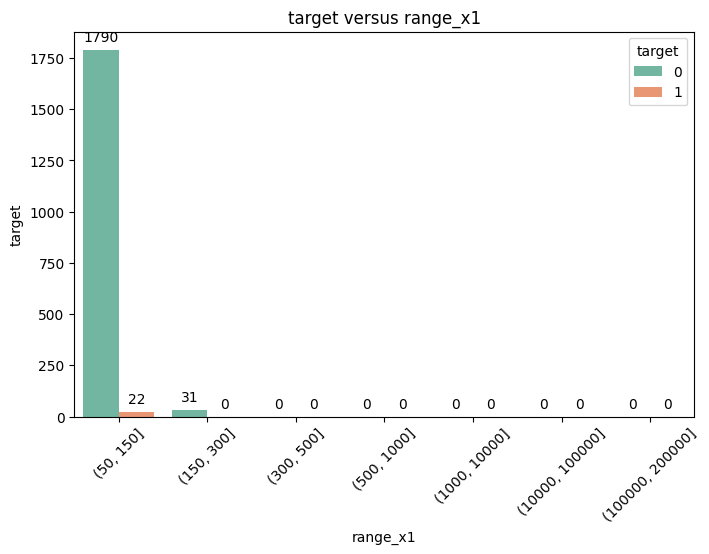

In [17]:
crear_grafico_rangos(df_rango_x1, "range_x1", "target")

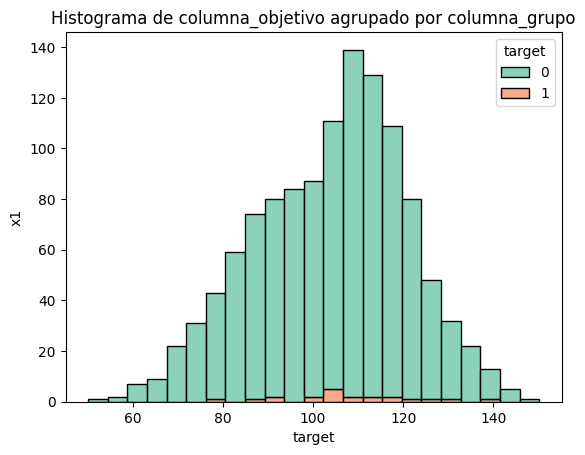

In [18]:
crear_grafico_histograma(df_x1, "x1", "target")

### X2

In [19]:
df_x2 = crear_tabla(df,"x2","target")
df_x2

,x2,target,Count
0,-326.0000,0,73
1,-324.1132,0,1
2,-324.0583,0,1
3,-323.8261,0,2
4,-323.2973,0,1
...,...,...,...
1157,-244.1818,0,1
1158,-242.6667,0,1
1159,-238.5000,0,1
1160,-236.0000,0,1


In [20]:
bins = [-350,-150]
df_rango_x2 = crear_tabla_por_rangos(df, "x2", "target", bins)
df_rango_x2

,range_x2,target,Count
0,"(-350, -150]",0,1821
1,"(-350, -150]",1,22


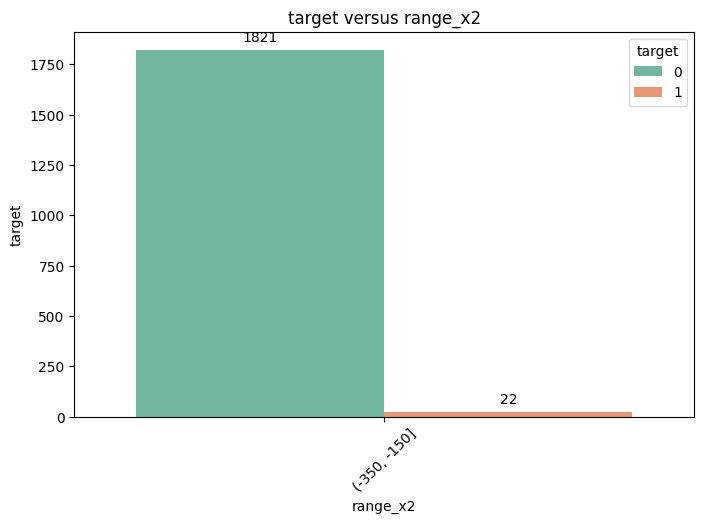

In [21]:
crear_grafico_rangos(df_rango_x2, "range_x2", "target")

### X3

In [22]:
df_x3 = crear_tabla(df,"x3","target")
df_x3

,x3,target,Count
0,LCV,0,904
1,LCV,1,10
2,QKP,0,75
3,QKP,1,4
4,SAT,0,567
5,SAT,1,4
6,XJB,0,275
7,XJB,1,4


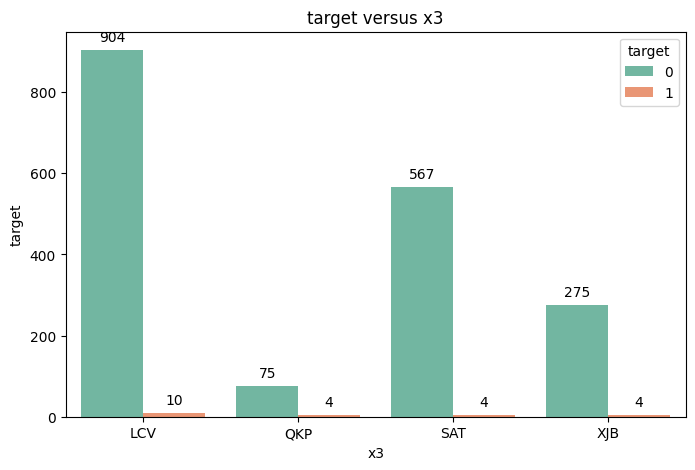

In [23]:
crear_grafico(df_x3, "x3", "target")

### X4

In [24]:
df_x4 = crear_tabla(df,"x4","target")
df_x4

,x4,target,Count
0,MZBER,0,1742
1,MZBER,1,19
2,PQKE,0,35
3,PQKE,1,1
4,YEQA,0,39
5,YEQA,1,2
6,ZUQF,0,5


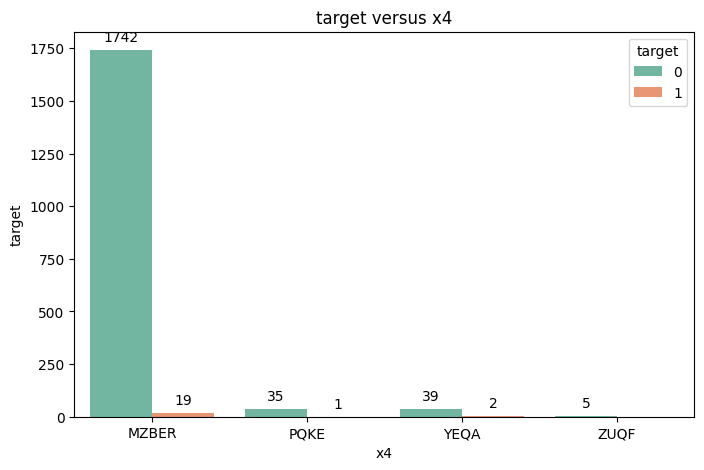

In [25]:
crear_grafico(df_x4, "x4", "target")

### X5

In [26]:
df_x5 = crear_tabla(df,"x5","target")
df_x5

,x5,target,Count
0,0,0,1804
1,0,1,14
2,1,0,17
3,1,1,8


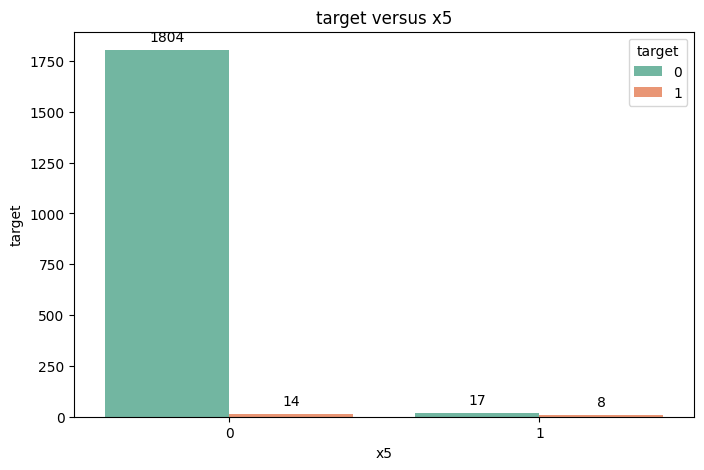

In [27]:
crear_grafico(df_x5, "x5", "target")

### X6

In [28]:
df_x6 = crear_tabla(df,"x6","target")
df_x6

,x6,target,Count
0,0,0,1774
1,0,1,15
2,1,0,47
3,1,1,7


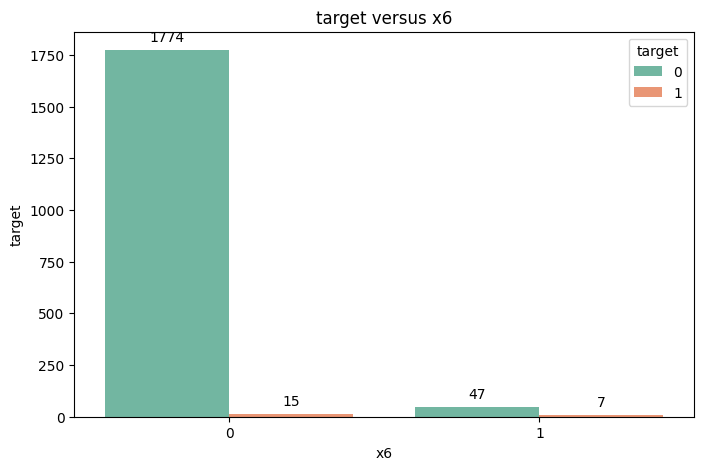

In [29]:
crear_grafico(df_x6, "x6", "target")

### X7

In [30]:
df_x7 = crear_tabla(df,"x7","target")
df_x7

,x7,target,Count
0,3,0,1493
1,3,1,18
2,4,0,101
3,4,1,1
4,5,0,83
5,6,0,144
6,6,1,2
7,8,1,1


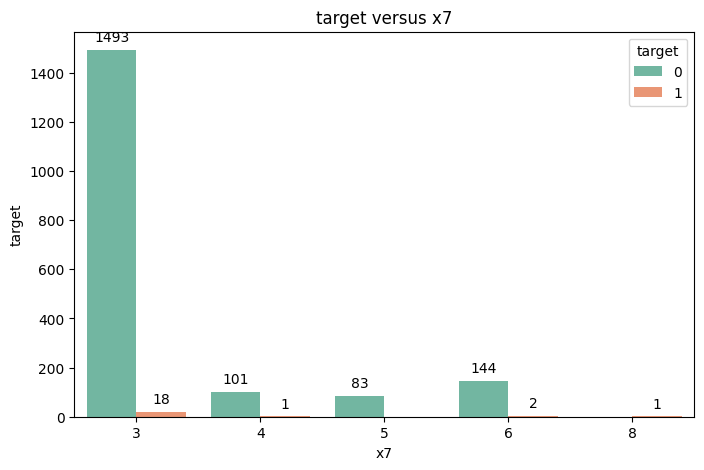

In [31]:
crear_grafico(df_x7, "x7", "target")

### X8

In [32]:
df_x8 = crear_tabla(df,"x8","target")
df_x8

,x8,target,Count
0,-7.5,0,289
1,-6.5,0,341
2,-6.5,1,5
3,-5.5,0,454
4,-5.5,1,8
5,-4.5,0,319
6,-4.5,1,4
7,-3.5,0,264
8,-3.5,1,3
9,-2.5,0,109


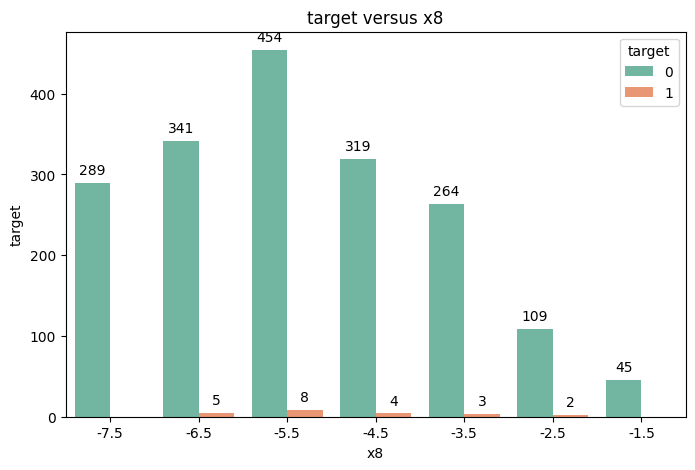

In [33]:
crear_grafico(df_x8, "x8", "target")

### Análisis Bivariado para variables numéricas y categóricas

In [34]:
# Análisis bivariado para dos variables numéricas

for col1 in df.select_dtypes(include=['int64', 'float64']).columns:
    for col2 in df.select_dtypes(include=['int64', 'float64']).columns:
        if col1 != col2:  # Evitar comparar una columna consigo misma
            print(f"Correlación entre {col1} y {col2}: {df[col1].corr(df[col2])}")

Correlación entre x1 y x2: 0.31764751176792777
Correlación entre x1 y x5: 0.017474730685137767
Correlación entre x1 y x6: -0.031133137197736922
Correlación entre x1 y x7: -0.16685125996264438
Correlación entre x1 y x8: 0.008502753114129062
Correlación entre x1 y target: 0.019112999050913095
Correlación entre x2 y x1: 0.3176475117679277
Correlación entre x2 y x5: -0.007768128815461838
Correlación entre x2 y x6: -0.0608425104209541
Correlación entre x2 y x7: -0.21591887984229602
Correlación entre x2 y x8: 0.10285271618944644
Correlación entre x2 y target: 0.006497228102973856
Correlación entre x5 y x1: 0.017474730685137767
Correlación entre x5 y x2: -0.007768128815461838
Correlación entre x5 y x6: 0.035253630190764634
Correlación entre x5 y x7: -0.003352960080311767
Correlación entre x5 y x8: 0.056859660738035105
Correlación entre x5 y target: 0.33263775721947875
Correlación entre x6 y x1: -0.03113313719773692
Correlación entre x6 y x2: -0.060842510420954087
Correlación entre x6 y x5: 0.

In [35]:
# Análisis bivariado para una variable categórica y una numérica

for cat_col in df.select_dtypes(include='object').columns:  # Variables categóricas
    for num_col in df.select_dtypes(include=['int64', 'float64']).columns:  # Variables numéricas
        print(f"Estadísticas descriptivas para {num_col} agrupadas por {cat_col}:")
        print(df.groupby(cat_col)[num_col].describe())
        print("\n")

Estadísticas descriptivas para x1 agrupadas por x3:
     count        mean        std      min        25%        50%         75%  \
x3                                                                             
LCV  914.0  104.186202  16.317978  50.1341  94.062275  106.17465  115.675325   
QKP   79.0  105.224459  16.534173  50.1341  92.021200  108.52300  116.378450   
SAT  571.0  105.107935  23.171388  50.1341  92.121300  106.38410  120.346900   
XJB  279.0  103.360099  15.506811  50.1341  92.806600  106.60470  113.981400   

          max  
x3             
LCV  150.1341  
QKP  138.9019  
SAT  150.1341  
XJB  141.8801  


Estadísticas descriptivas para x2 agrupadas por x3:
     count        mean        std    min        25%        50%         75%  \
x3                                                                           
LCV  914.0 -296.273735  12.611521 -326.0 -305.09375 -296.64355 -288.133825   
QKP   79.0 -295.704982  13.630418 -326.0 -306.07885 -295.23080 -288.217050   
SAT  


## 4. Ingeniería de Características
- Creación de nuevas características a partir de los datos existentes.
- Selección de características relevantes.
- Transformaciones aplicadas a las características.


In [36]:
# Convertir variables categóricas a numéricas utilizando One-Hot Encoding
df = pd.get_dummies(df, columns=['x3', 'x4'])

In [37]:
df


,x1,x2,x5,x6,x7,x8,target,range_x1,range_x2,x3_LCV,x3_QKP,x3_SAT,x3_XJB,x4_MZBER,x4_PQKE,x4_YEQA,x4_ZUQF
0,50.1341,-326.0000,0,0,6,-6.5,0,"(50, 150]","(-350, -150]",False,False,True,False,True,False,False,False
1,50.1341,-326.0000,0,0,6,-4.5,0,"(50, 150]","(-350, -150]",False,False,True,False,True,False,False,False
2,124.3276,-275.1935,0,0,3,-2.5,0,"(50, 150]","(-350, -150]",True,False,False,False,True,False,False,False
3,50.1341,-326.0000,0,0,3,-4.5,0,"(50, 150]","(-350, -150]",False,False,True,False,True,False,False,False
4,85.3905,-298.8632,0,0,5,-4.5,0,"(50, 150]","(-350, -150]",False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,119.2548,-283.6687,0,0,3,-2.5,0,"(50, 150]","(-350, -150]",False,True,False,False,True,False,False,False
1996,106.2410,-294.7023,0,0,3,-2.5,0,"(50, 150]","(-350, -150]",False,False,False,True,False,False,True,False
1997,127.0572,-295.2308,0,0,3,-5.5,0,"(50, 150]","(-350, -150]",False,False,True,False,True,False,False,False
1998,114.4653,-290.3312,0,0,3,-5.5,0,"(50, 150]","(-350, -150]",True,False,False,False,True,False,False,False


### 5. Modelado

1. **Selecciona los Modelos:**
   - Escoge varios modelos de clasificación que se adapten al tipo de datos y problema que estás resolviendo (e.g., `LGBMClassifier`, `RandomForest`, `LogisticRegression`).

2. **Justifica la Elección:**
   - Explica por qué seleccionaste cada modelo (e.g., `LGBMClassifier` es eficiente para datos grandes).

3. **Ajusta los Parámetros:**
   - Realiza una búsqueda de hiperparámetros (`GridSearchCV` o `RandomizedSearchCV`) para cada modelo.
   - Ajusta los parámetros según los mejores resultados obtenidos.

4. **Valida los Modelos:**
   - Divide los datos en entrenamiento y prueba (e.g., 80%-20%).
   - Aplica técnicas de validación cruzada (e.g., `cross_val_score`) para evaluar la estabilidad de los modelos.




In [38]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from lightgbm import LGBMClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir variables categóricas a numéricas utilizando One-Hot Encoding
df = pd.get_dummies(df, columns=['x3', 'x4'])

KeyError: "None of [Index(['x3', 'x4'], dtype='object')] are in the [columns]"

In [ ]:
# Función para calcular las métricas de clasificación
def classification_metrics(y_true, y_pred, y_proba=None) -> pd.DataFrame:
    df_result = pd.DataFrame()
    df_result['accuracy'] = [round(accuracy_score(y_true, y_pred), 4)]
    df_result['recall'] = [round(recall_score(y_true, y_pred, average="macro"), 4)]
    df_result['precision'] = [round(precision_score(y_true, y_pred, average="macro"), 4)]
    df_result['fscore'] = [round(f1_score(y_true, y_pred, average="macro"), 4)]
    if y_proba is not None:
        df_result['auc'] = [round(roc_auc_score(y_true, y_proba[:, 1]), 4)]
    return df_result

In [ ]:
# Separar características y variable objetivo
X = df.drop('target', axis=1)
y = df['target']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos
models = {
    'LightGBM': LGBMClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNeighbors': KNeighborsClassifier()
}

results = []

for model_name, model in models.items():
    print(f"Evaluando {model_name}...")
    start_time = time.time()
    model.fit(X_train, y_train)

    # Predicciones y probabilidades
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_proba = model.predict_proba(X_train) if hasattr(model, 'predict_proba') else None
    y_test_proba = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

    execution_time = time.time() - start_time

    # Métricas de entrenamiento
    train_metrics = classification_metrics(y_train, y_train_pred, y_train_proba)
    train_metrics = train_metrics.assign(
        model=model_name,
        data='train',
        time=execution_time
    )

    # Métricas de prueba
    test_metrics = classification_metrics(y_test, y_test_pred, y_test_proba)
    test_metrics = test_metrics.assign(
        model=model_name,
        data='test',
        time=execution_time
    )

    results.append(train_metrics)
    results.append(test_metrics)

In [ ]:
# Convertir los resultados a un DataFrame
results_df = pd.concat(results, ignore_index=True)

# Imprimir los resultados
results_df

In [ ]:
# Graficar la matriz de confusión
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

# Mostrar matrices de confusión para el modelo final (ejemplo con el último modelo)
model_name = 'LightGBM'
final_model = models[model_name]
y_final_test_pred = final_model.predict(X_test)
plot_confusion_matrix(y_test, y_final_test_pred, title=f'Matriz de Confusión - Prueba ({model_name})')

In [ ]:
results_df


## 8. Conclusiones
- Resumen de los hallazgos más importantes.
- Limitaciones del proyecto.
- Sugerencias para futuros trabajos o mejoras.
